## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
study_mouse_df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how ='outer')
study_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the DataFrame.
mice_count = study_mouse_df["Mouse ID"].count()
print(mice_count)

1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = study_mouse_df[study_mouse_df.duplicated(["Mouse ID"])]
#print("Duplicate rows based on Mouse ID:", duplicate_mice_df)
duplicate_mice_df = duplicate_mice_df.loc[:,["Mouse ID","Timepoint"]]
print(duplicate_mice_df)

     Mouse ID  Timepoint
1        k403          5
2        k403         10
3        k403         15
4        k403         20
5        k403         25
...       ...        ...
1888     z969         25
1889     z969         30
1890     z969         35
1891     z969         40
1892     z969         45

[1644 rows x 2 columns]


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = study_mouse_df[study_mouse_df.duplicated(["Mouse ID"])]
#print("Duplicate rows based on Mouse ID:", duplicate_mice_df)
duplicate_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [7]:
#Checking duplicate rows
duplicate_mouse=study_mouse_df.loc[study_mouse_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [8]:
#Looking at data for mouse g989
study_mouse_df.loc[study_mouse_df["Mouse ID"]=='g989'].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#study_mouse_df.drop_duplicates(subset="Mouse ID")
clean_study_mouse_df = study_mouse_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_study_mouse_df.head()

,Mouse ID,Drug,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
clean_study_mouse_df.rename(columns = {'Tumor Volume (mm3)': 'Tumor_Volume','Drug Regimen': 'Drug', 'Weight (g)': 'Weight'}, inplace = True)

C:\Users\rsand\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [10]:
#Compare clean data frame to first
clean_study_mouse_df.loc[clean_study_mouse_df["Mouse ID"]=='g989'].head()

,Mouse ID,Drug,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [11]:
#Compare the number of rows
print(len(study_mouse_df))
print(len(clean_study_mouse_df))

1893
1888


In [12]:
# Checking the number of mice in the clean DataFrame.
study_mouse_df.drop_duplicates(subset="Mouse ID").count()
study_mouse_df.rename(columns = {'Tumor Volume (mm3)': 'Tumor_Volume','Drug Regimen': 'Drug', 'Weight (g)': 'Weight'}, inplace = True)
#print(study_mouse_df.columns)
#print(study_mouse_df.count)
study_mouse_df.drop_duplicates(subset="Mouse ID").count().unique()
#study_mouse_df.drop_duplicates(subset="Mouse ID").count()

array([249], dtype=int64)

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
#  https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html?highlight=statistics
# This method is the most straighforward, creating multiple series and putting them all together at the end.
#  https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=variance
tumor_mean = clean_study_mouse_df.groupby("Drug").mean()["Tumor_Volume"]
#print("Tumor Volume Mean")
#print(tumor_mean)
tumor_median = clean_study_mouse_df.groupby("Drug").median()["Tumor_Volume"]
#print("Tumor Volume Median")
#print(timor_median)
tumor_variance = clean_study_mouse_df.groupby("Drug").var()["Tumor_Volume"]
#print("Tumor Volume Variance")
#print(tumor_variance)
tumor_standard_deviation = clean_study_mouse_df.groupby("Drug").std()["Tumor_Volume"]
#print("Tumor Volume Standard Deviation")
#print(tumor_standard_deviation)
tumor_standard_error_of_mean = clean_study_mouse_df.groupby("Drug").sem()["Tumor_Volume"]
#print("Tumor Volume Standard Error of Mean ")
#print(tumor_standard_error_of_mean )

In [14]:
tumor_volume_summary = pd.DataFrame({
                                        "Tumor Volume Mean":tumor_mean,
                                       "Tumor Volume Median":tumor_median,
                                       "Tumor Volume Variance":tumor_variance,
                                      "Tumor Volume Standard Deviation": tumor_standard_deviation,
                                        "Tumor Volume Standard Error of Mean":tumor_standard_error_of_mean})
tumor_volume_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Mean
Drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

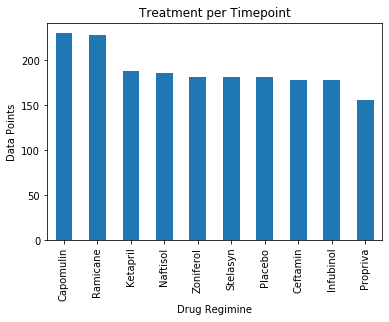

In [30]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pandas. 
#study_mouse_df.groupby("Drug")["Timepoint"].count()
drug_counts = clean_study_mouse_df["Drug"].value_counts()
#print(drug_counts)
drug_counts.plot(kind="bar")
plt.title("Treatment per Timepoint")
plt.xlabel("Drug Regimine")
plt.ylabel("Data Points");

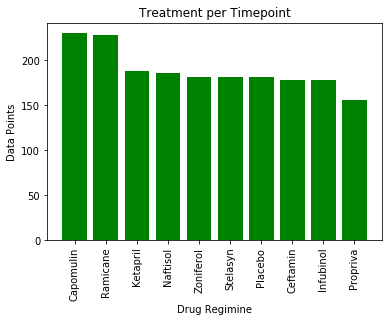

In [16]:
# Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study using pyplot.
drug_counts = clean_study_mouse_df["Drug"].value_counts()
plt.bar(drug_counts.index, drug_counts, color ='g', align = "center")
plt.xticks(rotation=90)
plt.title("Treatment per Timepoint")
plt.xlabel("Drug Regimine")
plt.ylabel("Data Points");

In [17]:
#to see everything in the index
drug_counts.index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype='object')

## Pie Plots

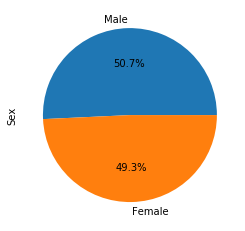

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = clean_study_mouse_df["Sex"].value_counts()
sex.plot(kind="pie",autopct = "%1.1f%%");

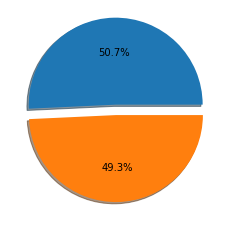

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels = ["Male", "Female"]
sex = clean_study_mouse_df["Sex"].value_counts()
#print(sex)
explode = (0.12, 0)
plt.pie(sex, explode = explode, autopct = "%1.1f%%", shadow = True);
#plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment 
#regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
top_drug_regimines = clean_study_mouse_df[clean_study_mouse_df["Drug"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#print(top_drug_regimines)
top_drug_regimines_data = top_drug_regimines[["Drug", "Mouse ID", "Timepoint", "Weight", "Tumor_Volume"]]
print(top_drug_regimines_data)
print(top_drug_regimines_data.count())


           Drug Mouse ID  Timepoint  Weight  Tumor_Volume
0      Ramicane     k403          0      16     45.000000
1      Ramicane     k403          5      16     38.825898
2      Ramicane     k403         10      16     35.014271
3      Ramicane     k403         15      16     34.223992
4      Ramicane     k403         20      16     32.997729
...         ...      ...        ...     ...           ...
1868  Infubinol     z581         25      25     54.316407
1869  Infubinol     z581         30      25     56.286750
1870  Infubinol     z581         35      25     58.628399
1871  Infubinol     z581         40      25     60.053740
1872  Infubinol     z581         45      25     62.754451

[814 rows x 5 columns]
Drug            814
Mouse ID        814
Timepoint       814
Weight          814
Tumor_Volume    814
dtype: int64


In [21]:
#used to compare
#max_tumor_mouse.info()

In [22]:
#used to compare
#max_tumor_mouse_merge.info()

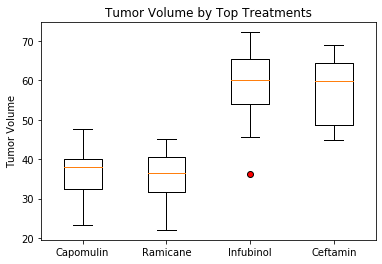

KeyError: 0.25

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#https://www.geeksforgeeks.org/python-pandas-series-last/
max_tumor_mouse = clean_study_mouse_df.groupby(["Mouse ID"]).max()
max_tumor_mouse.reset_index(inplace=True)
max_tumor_mouse_merge=max_tumor_mouse[["Mouse ID","Timepoint"]].merge(clean_study_mouse_df, on=["Mouse ID","Timepoint"], how = "left")
capomulin=max_tumor_mouse_merge.loc[max_tumor_mouse_merge["Drug"]=="Capomulin"]["Tumor_Volume"]
ramicane=max_tumor_mouse_merge.loc[max_tumor_mouse_merge["Drug"]=="Ramicane"]["Tumor_Volume"]
infubinol=max_tumor_mouse_merge.loc[max_tumor_mouse_merge["Drug"]=="Infubinol"]["Tumor_Volume"]
ceftamin=max_tumor_mouse_merge.loc[max_tumor_mouse_merge["Drug"]=="Ceftamin"]["Tumor_Volume"]
#top_drug_regimines_df = top_drug_regimines_data.groupby(["Drug", "Mouse ID"]).mean()["Tumor_Volume"]
#top_drug_regimines_df
#create a list of top drugs
top_drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#tumor_value_final = top_drug_regimines_data.groupby("Drug")["Tumor_Volume"].mean()
#print(tumor_value_final)
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume by Top Treatments")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot([capomulin, ramicane, infubinol, ceftamin], labels = top_drug_treatments, flierprops = {"markerfacecolor": "red"})

#plt.boxplot(tumor_value_final, patch_artist=True, labels = "top_drug_treatments")
plt.show()

quartiles = max_tumor_mouse_merge.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume  is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [24]:
#looking at the tumor volume to see if it changed
#max_tumor_mouse.head()

## Line and Scatter Plots

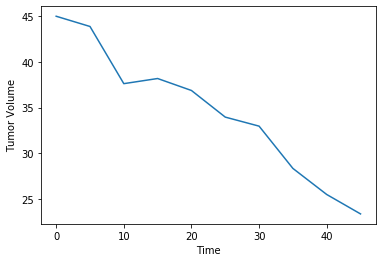

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#weight = study_mouse_df.groupby(["Weight"])[study_mouse_df.groupby(["Weight"])["Tumor_Volume"].mean()]
capomulin = clean_study_mouse_df.loc[clean_study_mouse_df["Drug"]=="Capomulin"]
capomulin.head()
mouse_data =capomulin.loc[capomulin["Mouse ID"]=="s185"]
plt.plot(mouse_data["Timepoint"],mouse_data["Tumor_Volume"]);
plt.xlabel("Time")
plt.ylabel("Tumor Volume");

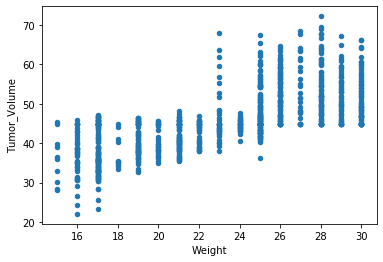

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#capomulin_scatter = clean_study_mouse_df.loc[study_mouse_df["Drug"]=="Capomulin"]
max_tumor_mouse_merge=max_tumor_mouse[["Mouse ID","Timepoint"]].merge(clean_study_mouse_df, on=["Mouse ID","Timepoint"], how = "left")
capomulin_scatter = max_tumor_mouse_merge[max_tumor_mouse_merge["Drug"].isin(["capomulin"])]
#print(capomulin_scatter)
capomulin_scatter_df = top_drug_regimines_data[["Mouse ID", "Weight", "Tumor_Volume"]]
#print(capomulin_scatter_df)
capomulin_scatter_weight = capomulin_scatter_df.groupby("Weight")["Tumor_Volume"].mean()
#print(capomulin_scatter_weight)
capomulin_scatter = capomulin_scatter_df.plot(kind = "scatter", x="Weight", y="Tumor_Volume")

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_scatter_df["Weight"]
y_values = capomulin_scatter_df["Tumor_Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Tumor Volume')
plt.ylabel('Weight of Mouse')
print(f"The r-squared is: {rvalue**2}")
plt.show()

NameError: name 'linregress' is not defined

In [31]:
#OBSERVATIONS
# The drug, capomulin, is effective in reducing the size of the tumor in mice. That is evident in the line graph above. 
# The boxplot show that infubinol has an outlier. This could be due to a mis-measuremnt on the tumor volume. 
# I do not understand why the quartiles are not working - the error is on .25. 
#I would not want to change that to anything greater the 25%.
# I also understand that the scatter plot is not working. Again I do not understand why - 
#I am not seeing the break in the code.
# Whatever is wrong in the scatter plot code is the reason why I am not successful pulling the correlation.
# I wish i could see the regression line. I would like to see how close it is to 1. 
# I look forward to any feedback!!